In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [3]:
df.head()

engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369

**Preparing the dataset**

Use only the following columns:

* 'engine_displacement',
* 'horsepower,'
* 'vehicle_weight',
* 'model_year',
* 'fuel_efficiency_mpg'

In [4]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [5]:
selected_columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[selected_columns]

In [6]:
df.head()

engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369

In [7]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

**EDA**
* Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

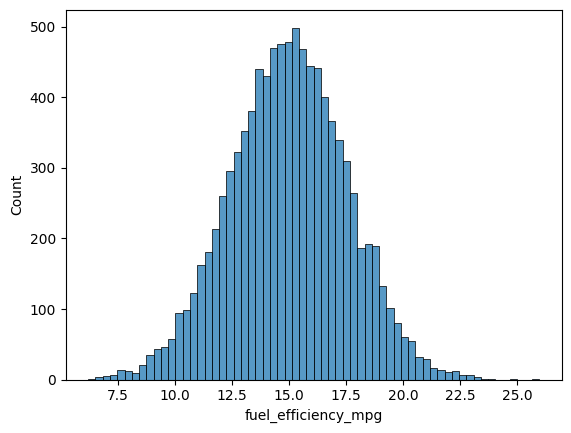

In [8]:
sns.histplot(df["fuel_efficiency_mpg"])

No it does not have a long tail

**Question 1**

**There's one column with missing values. What is it?**

* 'engine_displacement'
* 'horsepower'
* 'vehicle_weight'
* 'model_year'

In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

A1: Horsepower

**Question 2**
**What's the median (50% percentile) for variable 'horsepower'?**
+ 49
+ 99
+ 149
+ 199

In [10]:
df['horsepower'].median()

np.float64(149.0)

A2: 149

**Prepare and split the dataset**
+ Shuffle the dataset (the filtered one you created above), use seed 42.
+ Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [11]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [12]:
n, n_val + n_test + n_train

(9704, 9702)

In [13]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [15]:
df_train

engine_displacement  horsepower  vehicle_weight  model_year  \
483                   220       144.0     2535.887591        2009   
7506                  160       141.0     2741.170484        2019   
8795                  230       155.0     2471.880237        2017   
1688                  150       206.0     3748.164469        2015   
6217                  300       111.0     2135.716359        2006   
...                   ...         ...             ...         ...   
8387                  160       111.0     3038.134712        2002   
7331                  160       157.0     2877.624938        2006   
1696                  260       139.0     2606.972984        2009   
5685                  280       132.0     4004.214323        2014   
6735                  210       152.0     2500.175687        2020   

      fuel_efficiency_mpg  
483             16.642943  
7506            16.298377  
8795            18.591822  
1688            11.818843  
6217            19.402209  
...                   ...  
8387            14.203076  
7331            15.278030  
1696            16.964054  
5685            10.059094  
6735            17.593237  

[5822 rows x 5 columns]

In [16]:
df_train.reset_index(drop = True, inplace = True)
df_val.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

In [17]:
df_train.head()

engine_displacement  horsepower  vehicle_weight  model_year  \
0                  220       144.0     2535.887591        2009   
1                  160       141.0     2741.170484        2019   
2                  230       155.0     2471.880237        2017   
3                  150       206.0     3748.164469        2015   
4                  300       111.0     2135.716359        2006   

   fuel_efficiency_mpg  
0            16.642943  
1            16.298377  
2            18.591822  
3            11.818843  
4            19.402209

In [18]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [19]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 16.96405425,
       10.05909406, 17.59323665], shape=(5822,))

In [20]:
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

**Question 3**

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [21]:
mean_horsepower = df_train["horsepower"].mean()

In [22]:
np.sort(df["model_year"].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [23]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']

def prepare_X(df, i):
    df = df.copy()
    df["age"] = 2023 - df["model_year"]
    features = base + ["age"]
    return df[features].fillna(i).values

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [25]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

In [26]:
# Option 1: Fillna with 0
X_train_t1 = prepare_X(df_train, 0)
w0_t1, w_t1 = train_linear_regression(X_train_t1, y_train)

X_val_t1 = prepare_X(df_val, 0)
y_pred_t1 = w0_t1 + X_val_t1.dot(w_t1)
score_t1 = rmse(y_val, y_pred_t1)
print(score_t1)

0.5171866956560172


In [27]:
# Option 2: Fillna with mean
X_train_t2 = prepare_X(df_train, mean_horsepower)
w0_t2, w_t2 = train_linear_regression(X_train_t2, y_train)

X_val_t2 = prepare_X(df_val, mean_horsepower)
y_pred_t2 = w0_t2 + X_val_t2.dot(w_t2)
score_t2 = rmse(y_val, y_pred_t2)
print(score_t2)

0.4635366017460088


A3: Option with mean gives better RMSE since it has a lower RMSE than that of option with 0

**Q4.**
+ Now let's train a regularized linear regression.
+ For this question, fill the NAs with 0.
+ Try different values of r from this list: [0, 0.01, 1, 10, 100].
+ Use RMSE to evaluate the model on the validation dataset.
+ Round the RMSE scores to 2 decimal digits.
+ Which r gives the best RMSE?

In [28]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [29]:
for r in [0, 0.01, 1, 10, 100]:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, round(score, 2))

0 0.52
0.01 0.52
1 0.52
10 0.64
100 2.06


**Q5.**

+ We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
+ Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
+ For each seed, do the train/validation/test split with 60%/20%/20% distribution.
+ Fill the missing values with 0 and train a model without regularization.
+ For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
+ What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
+ Round the result to 3 decimal digits (round(std, 3))
  
What's the value of std?

In [30]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

score_list = []
for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train["fuel_efficiency_mpg"]
    del df_val["fuel_efficiency_mpg"]
    del df_test["fuel_efficiency_mpg"]

    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    score_list.append(score)

In [31]:
round(np.std(score_list),3)

np.float64(0.007)

**Q6.**

+ Split the dataset like previously, use seed 9.
+ Combine train and validation datasets.
+ Fill the missing values with 0 and train a model with r=0.001.
+ What's the RMSE on the test dataset?

In [32]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

df_full_train = pd.concat([df_train, df_val])
df_full_train

engine_displacement  horsepower  vehicle_weight  model_year  \
9066                  240       136.0     4050.512290        2006   
3073                  190       141.0     3195.866942        2017   
2476                  200       184.0     3006.164370        2017   
658                   200         NaN     2947.143980        2022   
954                   250       132.0     3114.371978        2001   
...                   ...         ...             ...         ...   
9202                  230       179.0     2717.552294        2003   
6449                  170       115.0     2760.369106        2022   
8083                  200       167.0     3470.715658        2003   
6182                  180       144.0     3605.310144        2016   
3886                  180       154.0     3346.965671        2018   

      fuel_efficiency_mpg  
9066            10.304700  
3073            13.479434  
2476            16.190653  
658             15.446503  
954             14.472172  
...                   ...  
9202            17.491551  
6449            15.630344  
8083            12.850141  
6182            11.681418  
3886            13.678140  

[7762 rows x 5 columns]

In [33]:
df_full_train.reset_index(drop=True, inplace=True)
df_full_train.head()

engine_displacement  horsepower  vehicle_weight  model_year  \
0                  240       136.0     4050.512290        2006   
1                  190       141.0     3195.866942        2017   
2                  200       184.0     3006.164370        2017   
3                  200         NaN     2947.143980        2022   
4                  250       132.0     3114.371978        2001   

   fuel_efficiency_mpg  
0            10.304700  
1            13.479434  
2            16.190653  
3            15.446503  
4            14.472172

In [34]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([10.30469994, 13.47943378, 16.19065297, ..., 12.85014104,
       11.68141813, 13.67814034], shape=(7762,))

In [35]:
X_full_train = prepare_X(df_full_train,0)
w0, w = train_linear_regression(X_full_train, y_full_train)
    
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)

0.515491532483234
